Question 1. What is Simple Linear Regression?
- Simple Linear Regression is used to find the linear relationship between two continuous variables, one independent variable and one dependent variable. It aims to find the best-fitting straight line through data points to model how the predictor variable influences the response variable.

Question 2. What are the key assumptions of Simple Linear Regression?
- The key assumptions of simple linear regression are linearity, independence, homoscedasticity, and normality of residuals.  
    - **Linearity :** The relationship between the independent variable (X) and the dependent variable (Y) is a straight line.
    - **Independence :** The errors in the predictions are not correlated with each other. Each observation is independent of the others.
    - **Homoscedasticity :** The variance of the errors is constant across all levels of the independent variable.
    - **Normality :** For any given value of the independent variable, the dependent variable is normally distributed, and the residuals follow a normal distribution.


Question 3. What is heteroscedasticity, and why is it important to address in regression models?
- Homoscedasticity is the assumption in linear regression that the variance of the errors is constant across all values of the independent variables. Heteroscedasticity is the violation of this assumption, where the variance of the residuals systematically changes with the independent variables.

- **Example :** The relationship between income and food expenditure is a classic example. Low-income individuals have a relatively narrow range of spending, while high-income individuals have a much wider range of possible spending, leading to a greater variance in food expenditure for higher incomes.
- **Why it's important to address**
    - **Unreliable statistical inference:** Heteroscedasticity does not bias the coefficient estimates themselves, but it makes the standard errors incorrect. This means that while the "best guess" for the coefficients might be okay, the measure of uncertainty around those guesses is wrong.
    - **Flawed hypothesis tests and confidence intervals:** Because the standard errors are unreliable, any hypothesis tests (like p-values) or confidence intervals based on them are invalid. This can lead to incorrect conclusions about the significance of your independent variables.
    - **Reduced precision:** The standard errors are underestimated when heteroscedasticity is present, making the model's estimates appear more precise than they actually are. This increases the chance that a coefficient estimate is further from its true population value.


Question 4. What is Multiple Linear Regression?
- Multiple Linear Regression (MLR) is a statistical method that uses several independent variables to predict the value of a single dependent variable. It extends simple linear regression by incorporating multiple factors, allowing for a more comprehensive analysis of how different variables relate to and influence an outcome. For example, MLR can be used to predict housing prices based on variables like area of house, number of bedrooms, parking area, and location. It finds the "best-fit" line through the data, which in multiple dimensions represents the relationship between the variables.

Question 5. What is polynomial regression, and how does it differ from linear regression?
- Polynomial regression models a non-linear relationship between variables by using a polynomial equation, whereas linear regression assumes a straight-line relationship. The key difference is that polynomial regression adds higher-degree terms (like \(x^2\), \(x^3\)) to the model, allowing it to fit curves in the data, while linear regression can only fit a straight line.

- **Key differences**

| Feature | Polynomial Regression | Linear Regression |
|:--------|:----------------------------------------------|:----------------------------------------|
| Relationship | Models non-linear, curved relationships | Models linear, straight-line relationships |
| Complexity | More complex; can handle intricate patterns | Simpler and easier to interpret |
| Model Equation | Includes higher-order terms like \(X^{2}\), \(X^{3}\), etc. | Includes only the first-order term, \(X\) |
| Flexibility | More flexible in fitting data, can capture curves | Less flexible, limited to linear trends |
| Risk of Overfitting | Higher risk of overfitting, especially with high-degree polynomials | Lower risk of overfitting |


Intercept: 0.18
Coefficient (slope): 1.98


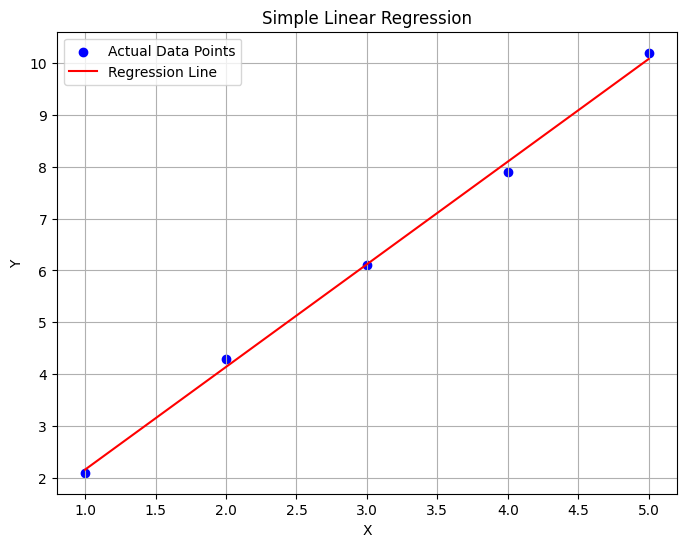

In [1]:
# Question 6: Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Reshape X to be a 2D array (required by scikit-learn)
X_reshaped = X.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_reshaped, y)

# Predict Y values using the fitted model
y_pred = model.predict(X_reshaped)

# Get the coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Coefficient (slope): {coefficient:.2f}")

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Question 7: Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create a DataFrame
data = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})

print("--- Sample Data ---")
display(data.head())

# Define independent variables (X) and dependent variable (y)
X = data[['Area', 'Rooms']]
y = data['Price']

# Add a constant to the independent variables for statsmodels
X_sm = sm.add_constant(X)

# Fit the Multiple Linear Regression model using statsmodels
model_sm = sm.OLS(y, X_sm).fit()

print("\n--- Multiple Linear Regression Model Summary ---")
print(model_sm.summary())

# Calculate VIF for multicollinearity check
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n--- Multicollinearity Check (VIF) ---")
print(vif_data)

print("\nInterpretation of VIF:\n")
print("- VIF = 1: No correlation between the feature and other features.\n")
print("- VIF between 1 and 5: Moderate correlation.\n")
print("- VIF > 5 or 10: High correlation, which might be problematic and suggests multicollinearity.")

--- Sample Data ---


,Area,Rooms,Price
0,1200,2,250000
1,1500,3,300000
2,1800,3,320000
3,2000,4,370000



--- Multiple Linear Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 03 Dec 2025   Prob (F-statistic):             0.0377
Time:                        14:58:02   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Intercept: 0.06
Coefficients: [0.   1.94 0.2 ]


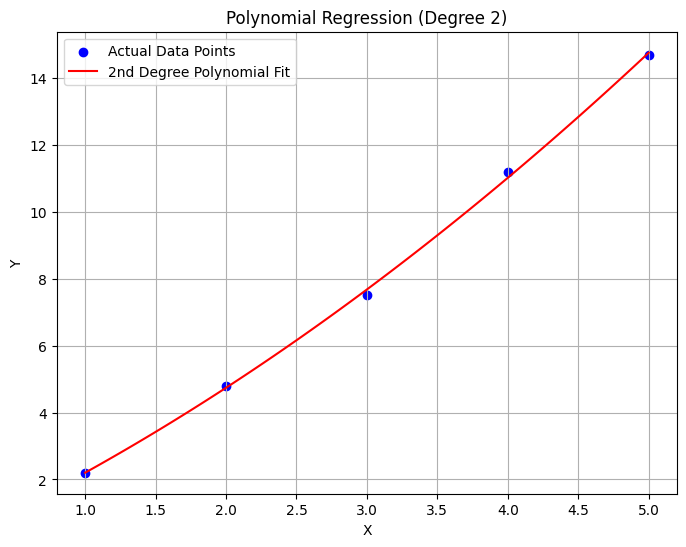

In [5]:
# Question 8: Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Reshape X to be a 2D array (required by scikit-learn)
X_reshaped = X.reshape(-1, 1)

# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_reshaped)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, Y)

# Predict Y values using the fitted model
Y_pred = model.predict(X_poly)

# Print the coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")

# Plot the original data points and the regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual Data Points')

# For plotting the curve smoothly, create a range of X values
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot_pred = model.predict(X_plot_poly)

plt.plot(X_plot, Y_plot_pred, color='red', label='2nd Degree Polynomial Fit')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

--- Residuals Plot ---

Interpretation for Heteroscedasticity:
- If the points are randomly scattered around the horizontal line at 0, with no clear pattern, then homoscedasticity (constant variance of errors) is present.
- If the spread of residuals increases or decreases as X increases (e.g., a fan shape or cone shape), it suggests heteroscedasticity.


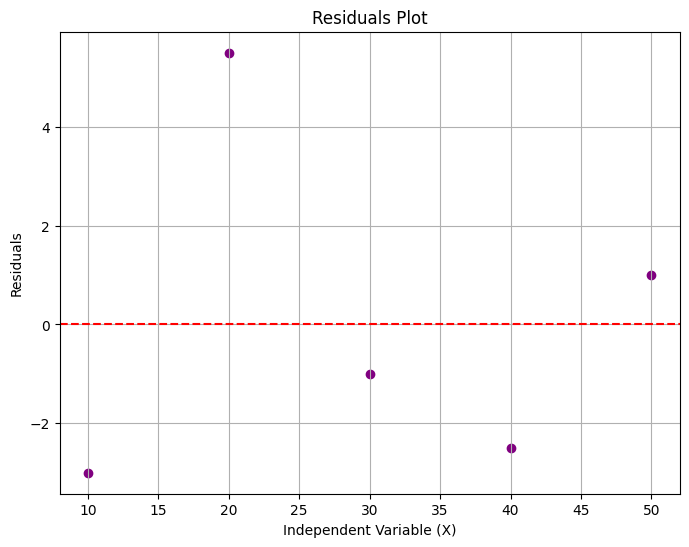

In [7]:
# Question 9: Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50])
Y = np.array([15, 35, 40, 50, 65])

# Reshape X to be a 2D array (required by scikit-learn)
X_reshaped = X.reshape(-1, 1)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_reshaped, Y)

# Predict Y values
Y_pred = model.predict(X_reshaped)

# Calculate residuals
residuals = Y - Y_pred

# Create the residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.grid(True)

print("--- Residuals Plot ---\n")
print("Interpretation for Heteroscedasticity:")
print("- If the points are randomly scattered around the horizontal line at 0, with no clear pattern, then homoscedasticity (constant variance of errors) is present.")
print("- If the spread of residuals increases or decreases as X increases (e.g., a fan shape or cone shape), it suggests heteroscedasticity.")
plt.show()

Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
- As a data scientist predicting house prices, encountering heteroscedasticity and multicollinearity is a common challenge. Here are the steps I would take to address these issues and ensure a robust model:

**Addressing Heteroscedasticity**

Heteroscedasticity means that the variance of the errors is not constant across all levels of the independent variables. This leads to inefficient (though still unbiased) coefficient estimates and incorrect standard errors, invalidating hypothesis tests and confidence intervals.

1. **Diagnosis:**
    - **Residuals Plot:** The primary way to detect heteroscedasticity is by plotting residuals against predicted values or independent variables. A 'fan' or 'cone' shape indicates heteroscedasticity.
    - **Statistical Tests:** Use formal tests like the Breusch-Pagan test or White test.

2. **Solutions:**
    - **Data Transformation:**
        - **Log Transformation (or Box-Cox Transformation):** Applying a log transformation to the dependent variable (house price) is often effective. If the errors are multiplicative rather than additive, a log transform can make them additive and stabilize variance. For example, log(Price).
        - **Square Root Transformation:** Also useful for reducing right-skewness and stabilizing variance.
    - **Weighted Least Squares (WLS):** If the pattern of heteroscedasticity is known (e.g., variance is proportional to a certain independent variable), WLS can be used. It assigns smaller weights to observations with larger variances, thereby giving them less influence.
    - **Robust Standard Errors (Heteroscedasticity-Consistent Standard Errors):** These adjust the standard errors of the OLS coefficients to account for heteroscedasticity without altering the coefficient estimates. This allows for valid hypothesis testing and confidence intervals even when heteroscedasticity is present.
    - **Re-evaluating Model Specification:** Sometimes, heteroscedasticity can indicate that important variables are missing from the model or that the functional form is incorrect. Adding relevant variables or using a non-linear model might help.

**Addressing Multicollinearity**

Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. This does not bias coefficient estimates but inflates their standard errors, making them unstable and difficult to interpret, and leading to wider confidence intervals.

1. **Diagnosis:**
    - **Correlation Matrix:** Examine the pairwise correlation between independent variables. High correlations (e.g., > 0.7 or 0.8) are a red flag.
    - **Variance Inflation Factor (VIF):** Calculate VIF for each independent variable. A VIF value above 5 or 10 typically indicates problematic multicollinearity.

2. **Solutions:**
    - **Feature Selection/Removal:**
        - If two variables are highly correlated, remove one of them. For example, 'number of bathrooms' and 'number of bedrooms' might be highly correlated with 'area'. I'd choose the one with stronger theoretical relevance or predictive power.
        - Use techniques like Recursive Feature Elimination (RFE) or Lasso regression (which also performs feature selection).

    - **Feature Engineering:**
        - **Combine Correlated Variables:** Create new features that combine the information from highly correlated variables. For example, instead of 'living area' and 'lot size' separately, create a 'ratio of living area to lot size'.
    - **Dimensionality Reduction:**
        - **Principal Component Analysis (PCA):** Transform the correlated features into a smaller set of uncorrelated components (principal components) that capture most of the variance. These components can then be used as predictors in the regression model.
    - **Regularization Methods:**
        - **Ridge Regression:** This technique adds a penalty equivalent to the square of the magnitude of coefficients, shrinking them towards zero. It is particularly good at handling multicollinearity by reducing the variance of the estimates.
        - **Lasso Regression:** Similar to Ridge but uses an L1 penalty, which can force some coefficients to be exactly zero, effectively performing feature selection alongside regularization.
    - Collect More Data: In some cases, increasing the sample size can mitigate multicollinearity if the correlations observed were due to a small sample size.

**Ensuring a Robust Model**

Beyond addressing these specific issues, I would also take the following general steps to ensure the model's robustness:

- **Cross-Validation:** Use techniques like K-fold cross-validation to assess the model's performance on unseen data and ensure it generalizes well.
- **Outlier Detection and Treatment:** Identify and handle outliers (e.g., using robust regression methods or transformations) as they can disproportionately influence coefficient estimates.
- **Model Evaluation Metrics:** Use appropriate metrics (e.g., R-squared, Adjusted R-squared, RMSE, MAE) and assess residual plots to confirm assumptions.
- **Domain Knowledge:** Always incorporate real estate domain knowledge to guide feature selection, engineering, and interpretation of results, ensuring the model's insights are practical and meaningful.
- **Iterative Process:** Model building is iterative. I would continuously refine the model, re-evaluate assumptions, and test different approaches until a satisfactory and robust model is achieved.